In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
sns.set_theme(style="whitegrid")

# dataset
data = pd.read_csv('conso-elec-gaz-annuelle-par-naf-agregee-region.csv', sep=';')
print(data.columns)
exclude_regions = ["La Réunion", "Martinique", "Mayotte", "Non affecté à une région", "Guyane", "Guadeloupe", "Corse"]
data_filtered = data[~data['libelle_region'].isin(exclude_regions)]
consumption_summary = data_filtered.groupby(['libelle_region', 'annee'])['conso'].sum().reset_index()

Index(['operateur', 'annee', 'filiere', 'code_categorie_consommation',
       'libelle_categorie_consommation', 'code_grand_secteur',
       'libelle_grand_secteur', 'code_naf', 'libelle_secteur_naf2', 'conso',
       'pdl', 'indqual', 'nombre_mailles_secretisees', 'code_region',
       'libelle_region'],
      dtype='object')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
sns.set_theme(style="whitegrid")

# dataset
data = pd.read_csv('conso-elec-gaz-annuelle-par-naf-agregee-region.csv', sep=';')
exclude_regions = ["La Réunion", "Martinique", "Mayotte", "Non affecté à une région", "Guyane", "Guadeloupe", "Corse"]
data_filtered = data[~data['libelle_region'].isin(exclude_regions)]

# population data
population = pd.read_excel('fr_population.region.departement.xls')
population = population.iloc[1:14]
population.columns = ['region', '1990', '1999', '2008', '2024']
population['pop'] = (population['2024'] + population['2008']) / 2
population['region'] = population['region'].replace({
    'Nouvelle Aquitaine': 'Nouvelle-Aquitaine',
    'Centre - Val de Loire': 'Centre-Val de Loire',
    'Bourgogne- Franche-Comté': 'Bourgogne-Franche-Comté',
})
population = population[['region', 'pop']]

# merge population data
consumption_summary = data_filtered.groupby(['libelle_region', 'annee'])['conso'].sum().reset_index()
consumption_summary = consumption_summary.merge(population, left_on='libelle_region', right_on='region', how='left')
consumption_summary['conso_per_capita'] = consumption_summary['conso'] / consumption_summary['pop']
consumption_summary.libelle_region.unique()

# pivot the data
heatmap_data = consumption_summary.pivot(index="libelle_region", columns="annee", values="conso")
total_consumption_by_region = consumption_summary.groupby('libelle_region')['conso'].sum().sort_values(ascending=False)
heatmap_data = consumption_summary.pivot(index="libelle_region", columns="annee", values="conso")
heatmap_data = heatmap_data.loc[total_consumption_by_region.index]
# save
heatmap_data.to_csv('heatmap_data.csv')

# normalized population heatmap
heatmap_data_norm = consumption_summary.pivot(index="libelle_region", columns="annee", values="conso_per_capita")
heatmap_data_norm = heatmap_data_norm.loc[total_consumption_by_region.index]
for col in heatmap_data_norm.columns:
    heatmap_data_norm[col] = heatmap_data_norm[col].astype(float)
# save
heatmap_data_norm.to_csv('heatmap_data_norm.csv')

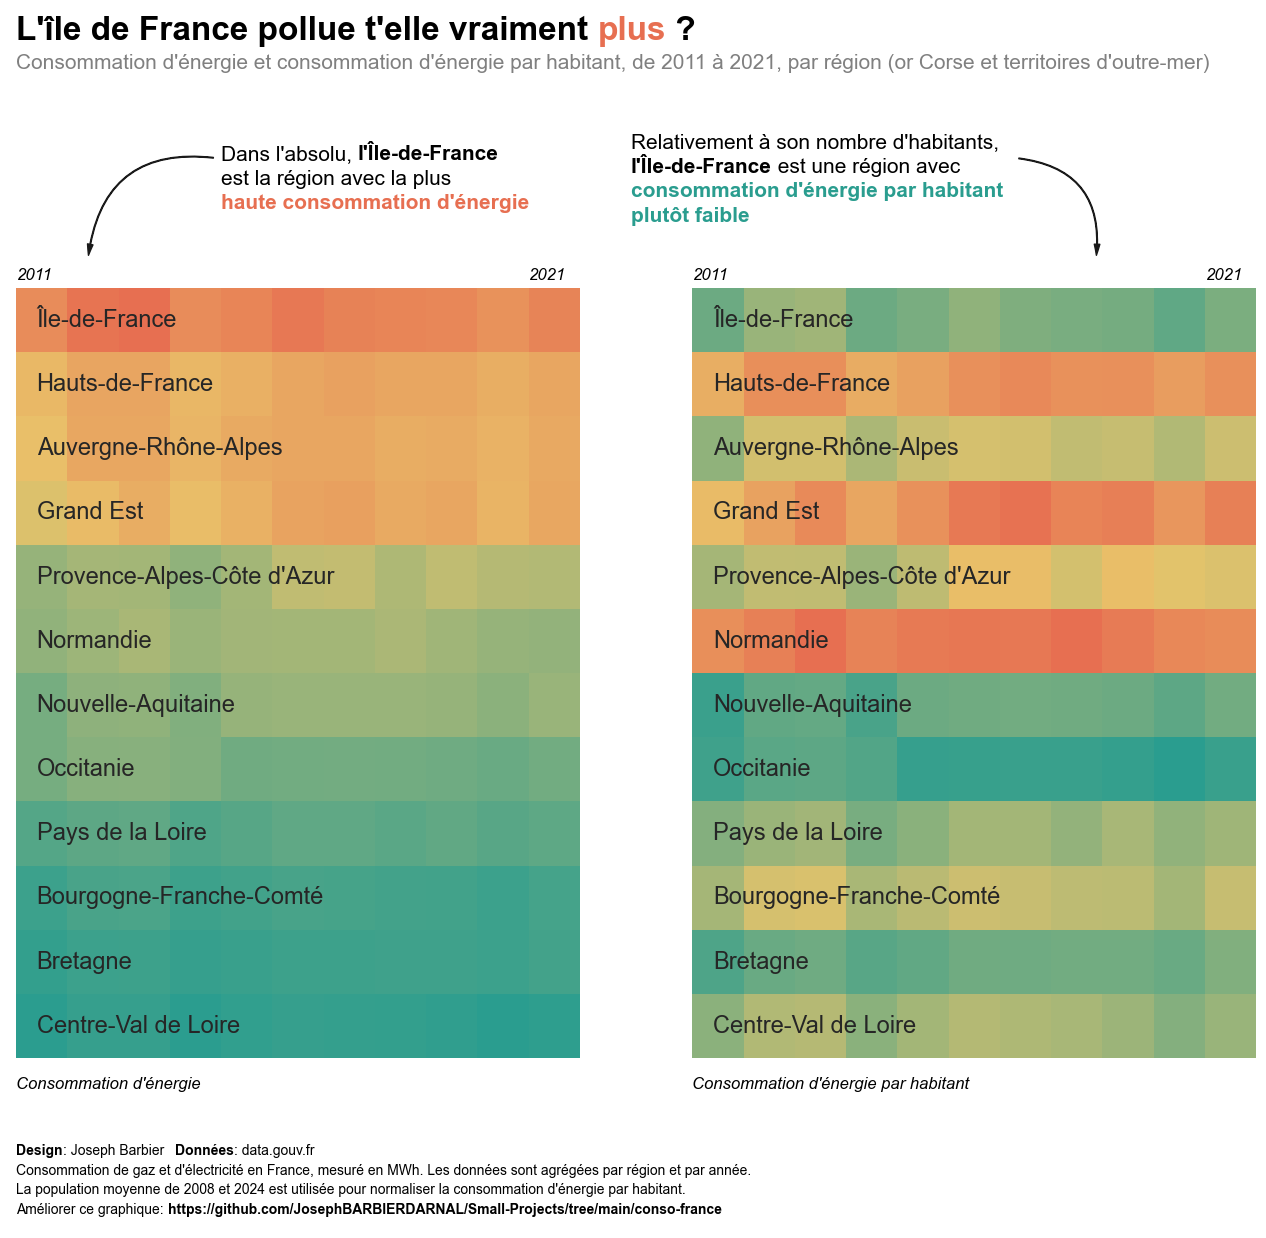

In [2]:
# create a custom colormap from green to red and plot the heatmap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#2a9d8f", "#e9c46a", "#e76f51"])
fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

for i, data in enumerate([heatmap_data, heatmap_data_norm]):
    sns.heatmap(
        data,
        cmap=cmap,
        ax=axs[i],
        cbar=False
    )
    axs[i].set_axis_off()

    for j,region in enumerate(data.index):
        axs[i].text(
            0.4,
            j+0.5,
            f"{region}",
            ha='left',
            va='center',
            fontsize=17,
            fontweight='light',
        )


# title
text = "L'île de France pollue t'elle vraiment <plus> ?"
ax_text(
    0, -4,
    text,
    ha='left', va='center',
    fontsize=24, fontweight='bold',
    color='black',
    highlight_textprops=[
        {"color": "#e76f51"}
    ],
    ax=axs[0]
)
text = "Consommation d'énergie et consommation d'énergie par habitant, de 2011 à 2021, par région (or Corse et territoires d'outre-mer)"
ax_text(
    0, -3.5,
    text,
    ha='left', va='center',
    fontsize=15, 
    color='grey',
    ax=axs[0]
)


# description of each heatmap
ax_text(
    0, 12.4,
    "<Consommation d'énergie>",
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[0]
)
ax_text(
    0, 12.4,
    "<Consommation d'énergie par habitant>",
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[1]
)

# date de référence
text = "<2011>"
ax_text(
    0, -0.2,
    text,
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[0]
)
text = "<2021>"
ax_text(
    10, -0.2,
    text,
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[0]
)
text = "<2011>"
ax_text(
    0, -0.2,
    text,
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[1]
)
text = "<2021>"
ax_text(
    10, -0.2,
    text,
    ha='left', va='center',
    fontsize=12, fontweight='light',
    color='black',
    highlight_textprops=[
        {"style": "italic"}
    ],
    ax=axs[1]
)

# fancy arrow
text = "Dans l'absolu, <l'Île-de-France>\nest la région avec la plus\n<haute consommation d'énergie>"
ax_text(
    4, -1.7,
    text,
    ha='left', va='center',
    fontsize=15, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"color": "#e76f51", "fontweight": "bold"}
    ],
    ax=axs[0]
)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.25, 1.01)
head_position = (0.17, 0.91)
a = FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=.5",
                            transform=fig.transFigure,
                            **kw)
fig.patches.append(a)

# fancy arrow
text = "Relativement à son nombre d'habitants,\n<l'Île-de-France> est une région avec\n<consommation d'énergie par habitant>\n<plutôt faible>"
ax_text(
    12, -1.7,
    text,
    ha='left', va='center',
    fontsize=15, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"color": "#2a9d8f", "fontweight": "bold"},
        {"color": "#2a9d8f", "fontweight": "bold"}
    ],
    ax=axs[0]
)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
tail_position = (0.75, 1.01)
head_position = (0.8, 0.91)
a = FancyArrowPatch(tail_position, head_position,
                            connectionstyle="arc3,rad=-.5",
                            transform=fig.transFigure,
                            **kw)
fig.patches.append(a)

# credit
text = """
<Design>: Joseph Barbier   <Données>: data.gouv.fr
Consommation de gaz et d'électricité en France, mesuré en MWh. Les données sont agrégées par région et par année.
La population moyenne de 2008 et 2024 est utilisée pour normaliser la consommation d'énergie par habitant.
Améliorer ce graphique: <https://github.com/JosephBARBIERDARNAL/Small-Projects/tree/main/conso-france>
"""
ax_text(
    0, 13.9,
    text,
    ha='left', va='center',
    fontsize=10, fontweight='light',
    color='black',
    highlight_textprops=[
        {"fontweight": "bold"},
        {"fontweight": "bold"},
        {"fontweight": "bold"}
    ],
    ax=axs[0]
)

# reduce margin between subplots
plt.subplots_adjust(hspace=0.1)
plt.show()
fig.savefig('electricity_consumption_heatmap_by_region_and_year.png', dpi=300, bbox_inches='tight')